In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df=pd.read_csv('Maternal Health Risk Data Set.csv')
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [17]:
df=df.drop(columns="RiskLevel")
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76


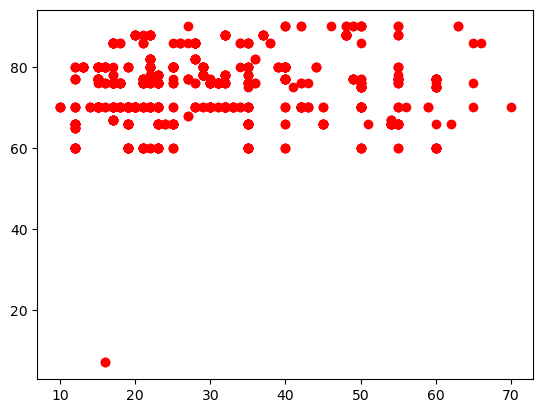

In [18]:
plt.scatter(df['Age'],df['HeartRate'],color='red')

In [19]:
from sklearn.ensemble import IsolationForest

In [21]:
clf=IsolationForest(contamination=0.1)
clf.fit(df)
pred= clf.predict(df)

In [22]:
pred

array([ 1,  1,  1, ..., -1,  1,  1])

In [25]:

abn_ind = np.where(pred<0)
abn_ind

(array([   7,   19,   20,   35,   91,  105,  108,  110,  111,  114,  117,
         123,  124,  130,  131,  166,  167,  180,  181,  191,  210,  232,
         262,  263,  275,  276,  277,  317,  319,  326,  337,  338,  339,
         340,  341,  362,  363,  370,  372,  413,  416,  417,  419,  422,
         426,  428,  432,  435,  442,  458,  471,  482,  486,  499,  502,
         506,  535,  538,  539,  551,  553,  583,  584,  596,  613,  631,
         640,  644,  657,  658,  661,  669,  670,  672,  679,  683,  689,
         772,  787,  789,  818,  848,  849,  908,  928,  939,  955,  961,
         962,  967,  970,  976,  982,  994,  995, 1000, 1001, 1010, 1011],
       dtype=int64),)

In [26]:
X = df.values

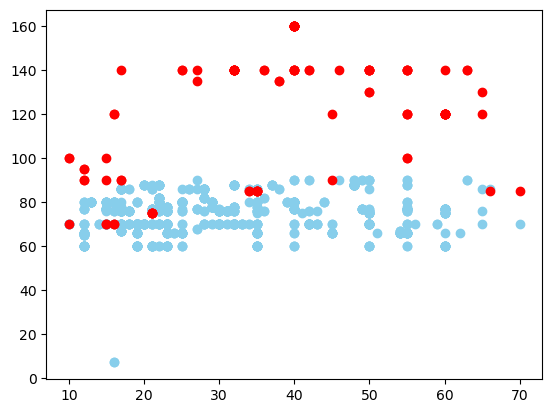

In [31]:
abn_ind=np.where(pred<0)
plt.scatter(df['Age'],df['HeartRate'],color='skyblue')
plt.scatter(X[abn_ind,0],X[abn_ind,1],color='red')

# DBSCAN

In [32]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_circles


In [33]:
X,y = make_circles(n_samples=750,noise=0.1,factor=0.3)
X

array([[-0.33287597,  0.02923609],
       [ 0.08476867,  0.12108717],
       [ 0.46239162,  1.00772196],
       ...,
       [ 0.20279773,  0.89138956],
       [ 0.32487037,  0.07833528],
       [-0.59193247, -0.85666783]])

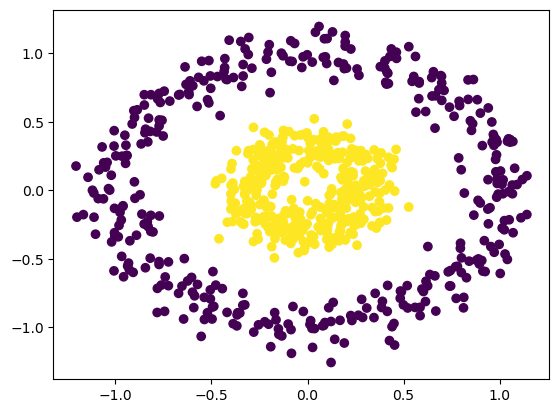

In [34]:
plt.scatter(X[:,0],X[:,1],c=y)

In [35]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.10)

In [36]:
dbscan.fit_predict(X)

array([ 0,  0,  1,  2,  3,  1,  1,  0,  0,  4, -1,  0,  4,  1,  3,  2,  0,
       -1,  0,  5,  0,  5,  7,  2,  0,  0,  4,  0,  2,  0,  6,  0,  6,  2,
        0,  0,  2,  7,  2,  0,  0,  0,  0,  2,  7,  2,  0,  2,  7,  0,  1,
        2,  7,  0,  0,  0,  0,  5,  4,  0,  7,  0,  0, -1,  2,  5,  0,  0,
        0,  0,  7, -1,  0,  0,  0,  0,  0,  0,  0,  7,  7,  2,  6,  0,  0,
        0,  0,  0,  7,  0,  0,  8,  0,  4,  2,  0,  6,  7,  4,  0,  0,  0,
        0,  7,  0,  0,  2,  6,  7,  4,  0,  2,  0,  7,  0,  2,  2,  2,  0,
        0,  0,  0,  0,  0,  0,  2,  4,  0,  0,  0,  7,  0,  0, -1,  4,  0,
        0,  3, -1, -1,  0,  2,  0,  2,  0,  2,  2,  8,  7,  0,  0,  0,  0,
        0,  6,  4,  0,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0,  4,  2,  0,
        0,  0, -1,  3,  3,  0, 10,  0,  0,  2,  0,  4,  0,  0,  0,  4,  5,
        0,  2,  4,  0,  2,  0,  4,  4,  6,  8,  7,  0,  0,  0, -1,  4,  0,
        2,  0,  2,  2,  7,  0,  2,  3,  1,  7,  0,  0,  0, -1,  0,  7,  0,
       -1,  0,  3,  0,  0

In [37]:
dbscan.labels_

array([ 0,  0,  1,  2,  3,  1,  1,  0,  0,  4, -1,  0,  4,  1,  3,  2,  0,
       -1,  0,  5,  0,  5,  7,  2,  0,  0,  4,  0,  2,  0,  6,  0,  6,  2,
        0,  0,  2,  7,  2,  0,  0,  0,  0,  2,  7,  2,  0,  2,  7,  0,  1,
        2,  7,  0,  0,  0,  0,  5,  4,  0,  7,  0,  0, -1,  2,  5,  0,  0,
        0,  0,  7, -1,  0,  0,  0,  0,  0,  0,  0,  7,  7,  2,  6,  0,  0,
        0,  0,  0,  7,  0,  0,  8,  0,  4,  2,  0,  6,  7,  4,  0,  0,  0,
        0,  7,  0,  0,  2,  6,  7,  4,  0,  2,  0,  7,  0,  2,  2,  2,  0,
        0,  0,  0,  0,  0,  0,  2,  4,  0,  0,  0,  7,  0,  0, -1,  4,  0,
        0,  3, -1, -1,  0,  2,  0,  2,  0,  2,  2,  8,  7,  0,  0,  0,  0,
        0,  6,  4,  0,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0,  4,  2,  0,
        0,  0, -1,  3,  3,  0, 10,  0,  0,  2,  0,  4,  0,  0,  0,  4,  5,
        0,  2,  4,  0,  2,  0,  4,  4,  6,  8,  7,  0,  0,  0, -1,  4,  0,
        2,  0,  2,  2,  7,  0,  2,  3,  1,  7,  0,  0,  0, -1,  0,  7,  0,
       -1,  0,  3,  0,  0

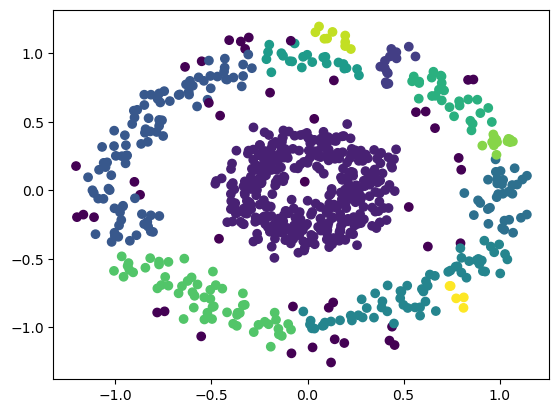

In [38]:
plt.scatter(X[:,0],X[:,1],c=dbscan.labels_)

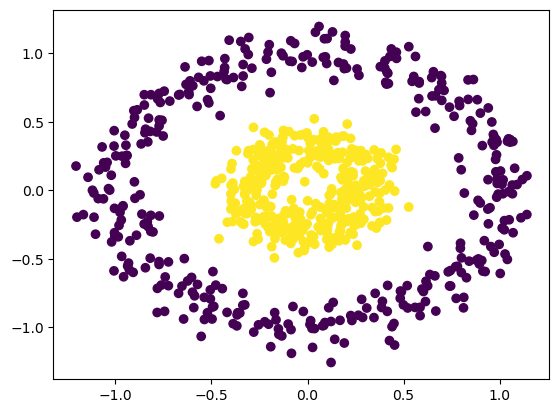

In [39]:
plt.scatter(X[:,0],X[:,1],c=y)

# Local outlier factors

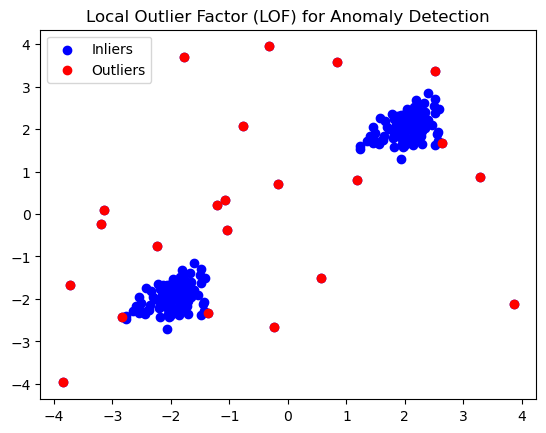

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Generate random data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# Combine inliers and outliers
X = np.r_[X_inliers, X_outliers]

# Fit the LOF model
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)

# Plotting
plt.title("Local Outlier Factor (LOF) for Anomaly Detection")
plt.scatter(X[:, 0], X[:, 1], color='b', label="Inliers")
plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1], color='r', label="Outliers")
plt.legend()
plt.show()